In [34]:
#릿지 회귀=선형모델 + 가중치 최소화
#w의 영향력을 축소화 하여 모델의 간격화를 목적으로 두고 있다.
#가중치의 절대값을 가능한 작게 하자
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
#경고창 삭제하기
import warnings
warnings.filterwarnings('ignore')


#폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

from sklearn.neighbors import KNeighborsRegressor
#train_test_split를 정의 해줘야 하기에 아래 라이브러리 만들어줍니다.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge #디폴트 값이 1인 상태
#보스턴 주택을 이용하여 릿지 회귀를 분석
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
boston=load_boston()
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test= train_test_split(X,y,random_state=0)
ridge = Ridge().fit(X_train,y_train)

In [35]:
print("훈련 세트 점수:{:.2f}".format(ridge.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test,y_test)))

훈련 세트 점수:0.89
테스트 세트 점수: 0.75


In [36]:
#계수의 크기가 0에 가까울 수록 선형모델과 비슷해진다.

In [37]:
#alpha =10 과소적합
#계수의 편차가 적다, 계수를 0에 더 가까워지고
#훈련데이터의 성능이 나빠진다
#일반화에 도움이 된다, 복잡도가 낮아진다

In [38]:
ridge10 = Ridge(alpha=10).fit(X_train,y_train)
print("훈련 세트 점수:{:.2f}".format(ridge10.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test,y_test)))

훈련 세트 점수:0.79
테스트 세트 점수: 0.64


In [39]:
ridge10 = Ridge(alpha=0.01).fit(X_train,y_train)
print("훈련 세트 점수:{:.2f}".format(ridge10.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test,y_test)))

훈련 세트 점수:0.94
테스트 세트 점수: 0.70


In [40]:
#alpha가 작으면 계수 편가 커지고 선형모델과 비슷해집니다
#계수에 대한 제약이 풀린다.

In [41]:
#선형모델은 훈련집합에 대한 높은성능
#과대적합이며 데이터증가시 과대적합이 감소
#적은수의 훈련데이터에 대해 정확도가 좋다
#릿지모델은 테스트집합에 대해 높은 성능 이며
#데티어 증가시 규제효과가 감소하기에 복잡한 모델에 사용됩니다.

In [42]:
#라쏘회귀=알파크기에 따라서 사용되는 특성의 개수가 조절가능 합니다
#특징들 중 일부가 중요하거나 완전히 제외되는 특징이 있을 때 사용이 유리하다
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(lasso.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso.score(X_test,y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso.coef_ !=0)))

훈련 세트 점수: 0.29
테스트 세트 점수: 0.21
사용한 특성의 개수: 4


In [43]:
#알파가 1일 때 낮은 성능,적은특성 사용, 과소적합인게 보입니다

In [44]:
lasso001 = Lasso(alpha=0.01,max_iter=100000).fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(lasso001.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso001.score(X_test,y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso001.coef_ !=0)))

훈련 세트 점수: 0.90
테스트 세트 점수: 0.77
사용한 특성의 개수: 33


In [45]:
lasso00001 = Lasso(alpha=0.0001,max_iter=100000).fit(X_train,y_train)
print("훈련 세트 점수: {:.2f}".format(lasso00001.score(X_train,y_train)))
print("테스트 세트 점수: {:.2f}".format(lasso00001.score(X_test,y_test)))
print("사용한 특성의 개수: {}".format(np.sum(lasso00001.coef_ !=0)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.64
사용한 특성의 개수: 96


In [46]:
#0.01 일때는 패널티 효과감소, 복잡도 증가를 보였습니다.
#즉 작게하면 선형모델과 유사함을 알수가 있습니다.

Text(0, 0.5, '계수크기')

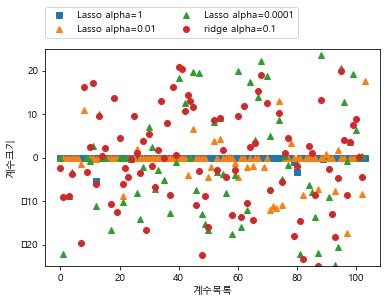

In [47]:
plt.plot(lasso.coef_,'s',label="Lasso alpha=1")
plt.plot(lasso001.coef_,'^',label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_,'^',label="Lasso alpha=0.0001")

plt.plot(ridge10.coef_,'o',label="ridge alpha=0.1")
plt.legend(ncol=2, loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel("계수목록")
plt.ylabel("계수크기")

In [ ]:
#알파 값이 작을수록 계수크기는 커지며 규제를 받지 않게 된다.

In [51]:
#분류용 선형모델 : 로지스틱 회귀분석
#두개의 값만 갖는 모델
#독립변수의 선형결합을 통해 사건의 발생 가능성을 예측하는 겁니다.
#무한의 값을 가는 선형 회귀 식을 통해 두개의 값만을 갖는 결과를 가져와야한다(0또는 1)

from sklearn.linear_model import LogisticRegression
from sklearn import datasets
iris = datasets.load_iris()
print(list(iris.keys()))
print("타깃의 이름:{}".format(iris['target_names']))
print("특성의 이름:{}".format(iris['feature_names']))
X=iris["data"][:,3:]
print(X.shape) #pental width
y=(iris["target"]==2).astype(np.int) #virgincia면 1 아니면 0
print(y.shape)

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']
타깃의 이름:['setosa' 'versicolor' 'virginica']
특성의 이름:['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150, 1)
(150,)


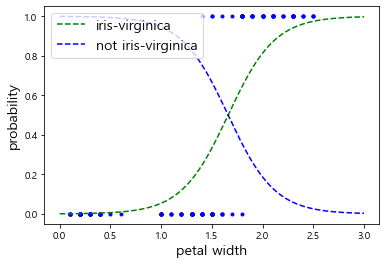

array([1, 0, 0, 1])

In [53]:
log_reg =LogisticRegression()
log_reg.fit(X,y)
#꽃잎의 너비가 0-3cm인 꽃에 대해 모델의 추정확률
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X,y,"b.")
plt.plot(X_new,y_proba[:,1],"g--",label="iris-virginica")
plt.plot(X_new,y_proba[:,0],"b--",label="not iris-virginica")
plt.xlabel("petal width",fontsize=14)
plt.ylabel("probability",fontsize=14)
plt.legend(loc="upper left",fontsize=14)
plt.show()
log_reg.predict([[1.7],[1.5],[1.3],[2.0]])

In [ ]:
#곡선이 만나는 점에 따라서 왼쪽이면 not 오른쪽이면 virgincia로 분류가 된다

In [56]:
#Cancer 분류 : malignant vs.benign
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data,cancer.target,stratify=cancer.target,random_state=42)
logreg =LogisticRegression(max_iter=5000).fit(X_train,y_train)
print("훈련 세트 점수: {: .3f}".format(logreg.score(X_train,y_train)))
print("테스트 세트 점수: {: .3f}".format(logreg.score(X_test,y_test)))

훈련 세트 점수:  0.958
테스트 세트 점수:  0.958


In [ ]:
#C가 1인게 디폴트 값이며, 값에 따라 복잡도,성능,규제가 바뀐다

In [57]:
logreg100 =LogisticRegression(C=100,max_iter=5000).fit(X_train,y_train)
print("훈련 세트 점수: {: .3f}".format(logreg100.score(X_train,y_train)))
print("테스트 세트 점수: {: .3f}".format(logreg100.score(X_test,y_test)))

훈련 세트 점수:  0.984
테스트 세트 점수:  0.965


In [ ]:
#C가 클수록 패널티가 작아지며 규제완화, 훈련세트에 맞추려고 하며 성능이 향상

In [59]:
logreg001 =LogisticRegression(C=0.01,max_iter=5000).fit(X_train,y_train)
print("훈련 세트 점수: {: .3f}".format(logreg001.score(X_train,y_train)))
print("테스트 세트 점수: {: .3f}".format(logreg001.score(X_test,y_test)))

훈련 세트 점수:  0.953
테스트 세트 점수:  0.951


In [ ]:
#C가 작아질수록 규제강화,패널티가 커지며 계수를 0에 가깝게 된다,성능이 약화

In [ ]:
#전반적으로 코드에 따라서는 이해가 쉬우나 좀 더 복습을 해보아야 할 것 같습니다..